Импорт библиотек для работы с данными.

In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})

Чтение файла с данными

In [28]:
data = pd.read_csv('data_regression_test.csv',sep= ';')

Отобразим начальные и конечные признаки в данном наборе данных.

In [29]:
display(data)
print(data.info())

,mag_id,rev_am,org_id,reg_id,district_id,days open,lat,lon,cluster,count,...,cat2_k2,cat3_k2,cat1_k1,cat4_k1,cat2_k1,cat3_k1,cat1_k3,cat4_k3,cat2_k3,cat3_k3
0,1,0.271793,1,1,1,7306,55.653785,37.767043,119,52,...,0.268793,0.294530,0.483861,0.204146,0.314663,0.430373,0.621938,0.290341,0.233704,0.279691
1,3,0.419363,1,1,3,7189,55.720822,37.574640,156,3,...,0.000000,0.000000,0.373951,0.195983,0.485056,0.395880,0.175030,0.130655,0.091180,0.069799
2,4,0.407493,1,1,2,7159,55.639461,37.607063,129,27,...,0.320751,0.296725,0.435382,0.313573,0.347343,0.355943,0.484975,0.313573,0.258315,0.242499
3,5,0.482371,1,1,5,7111,55.816573,37.501706,167,3,...,0.000000,0.000000,0.383203,0.940338,0.371912,0.385952,0.269041,0.940338,0.104867,0.102073
4,6,0.271793,1,1,1,7054,55.663819,37.741978,119,52,...,0.268793,0.294530,0.483861,0.204146,0.314663,0.430373,0.621938,0.290341,0.233704,0.279691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,465,0.208788,23,3,41,43,0.000000,0.000000,615,5,...,0.000000,0.000000,0.313722,0.164488,0.284259,0.267435,0.293680,0.219317,0.106869,0.094305
372,466,0.278802,1,1,5,41,0.000000,0.000000,114,8,...,0.306794,0.218728,0.423506,0.202837,0.471277,0.418954,0.264486,0.152127,0.176362,0.137783
373,467,0.208788,34,3,52,38,0.000000,0.000000,990,5,...,0.000000,0.000000,0.221983,0.052175,0.211612,0.282285,0.155851,0.052175,0.059668,0.074656
374,468,0.208788,1,1,2,37,0.000000,0.000000,465,11,...,0.394511,0.504307,0.720076,0.431662,0.523681,0.637453,0.976030,0.604326,0.364530,0.437745


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mag_id       376 non-null    int64  
 1   rev_am       376 non-null    float64
 2   org_id       376 non-null    int64  
 3   reg_id       376 non-null    int64  
 4   district_id  376 non-null    int64  
 5   days open    376 non-null    int64  
 6   lat          376 non-null    float64
 7   lon          376 non-null    float64
 8   cluster      376 non-null    int64  
 9   count        376 non-null    int64  
 10  count_am     376 non-null    int64  
 11  count_k2     376 non-null    int64  
 12  count_k1     376 non-null    int64  
 13  count_k3     376 non-null    int64  
 14  rev_k2       376 non-null    float64
 15  rev_k1       376 non-null    float64
 16  rev_k3       376 non-null    float64
 17  cat1_k2      376 non-null    float64
 18  cat4_k2      376 non-null    int64  
 19  cat2_k2 

В наборе  признаки представлены численными значениями, кодировка и преобразование признаков не требуется. Видно, что в последних строках отсутствуют значения широты и долготы для каждого магазина. Заменить или преобразовать этипризнаки никак не получится, так как нет априорных знаний о их координатах. Оценим зависимость целевой переменной от данных признаков: 

In [30]:
cols_coord = ['lat','lon','rev_am']
df_coord = data[cols_coord]
df_coord.corrwith(data[cols_coord[-1]])

lat      -0.017029
lon       0.179298
rev_am    1.000000
dtype: float64

Как можно видеть, данные признаки практически не влияют на целевую переменную. Поэтому все значения, равные 0 можно удалить. Также такой признак как Count является суммой всех признаков count_am, count_k1, count_k2, count_k3. Их также можно удалить.

<AxesSubplot:>

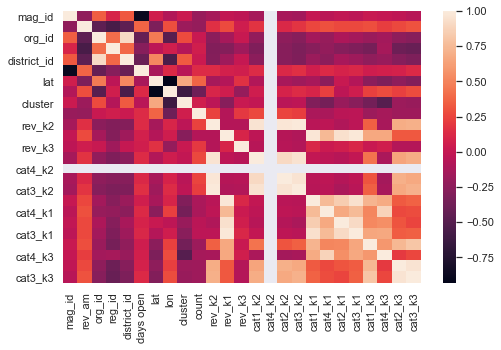

In [31]:
df = pd.DataFrame(data = data, columns = data.columns)
df['lat']
for i in range(len(df['lat'])):
    if df['lat'][i] == 0:
        k = i
        break
df = df[0:k]
df.drop(['count_k1','count_k2', 'count_k3', 'count_am'], axis = 1, inplace = True)
target = df['rev_am']
sns.heatmap(df.corr())

Как видно из матрицы корреляций, в данном наборе данных существует значительная корреляция между признаками. Заполним все нулевые значения медианными для каждого столбца,  предварительно удалив из основного набора данных уже вынесенную в отдельную переменную целевое значение и признак cat4_k2.

<AxesSubplot:>

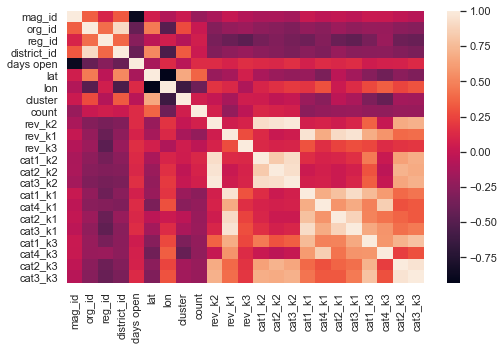

In [32]:
df.drop(['rev_am','cat4_k2'], axis = 1, inplace = True);
df=df.mask(df==0).fillna(df.median())
sns.heatmap(df.corr())

После преобразований некоторые признаки стали менее коррелированными, однако в данном наборе данных все еще существует множество признаков, между которыми корреляция достаточно велика. Так как информации о данных признаках нет, просто удалить их не представляется возможным. Тогда оценим корреляции между целевой переменной и остальными признаками с целью выявления потенциальной возможности переобучения.

In [33]:
df.corrwith(target).sort_values(ascending=False)

cat3_k1        0.406404
rev_k1         0.390014
cat2_k1        0.389589
rev_k3         0.376949
days open      0.373280
cat1_k1        0.364400
cat4_k1        0.363601
cat3_k3        0.302563
lon            0.288033
cat1_k3        0.286214
cat4_k3        0.273486
cat2_k3        0.264550
cat3_k2        0.210631
cat1_k2        0.202672
rev_k2         0.185120
cat2_k2        0.139599
cluster       -0.180827
count         -0.206767
mag_id        -0.228838
lat           -0.313714
org_id        -0.455687
district_id   -0.460241
reg_id        -0.561620
dtype: float64

Построим совместные графики целевой переменной и признаков, которые имеют наибольшую корреляцию с целевой переменной.

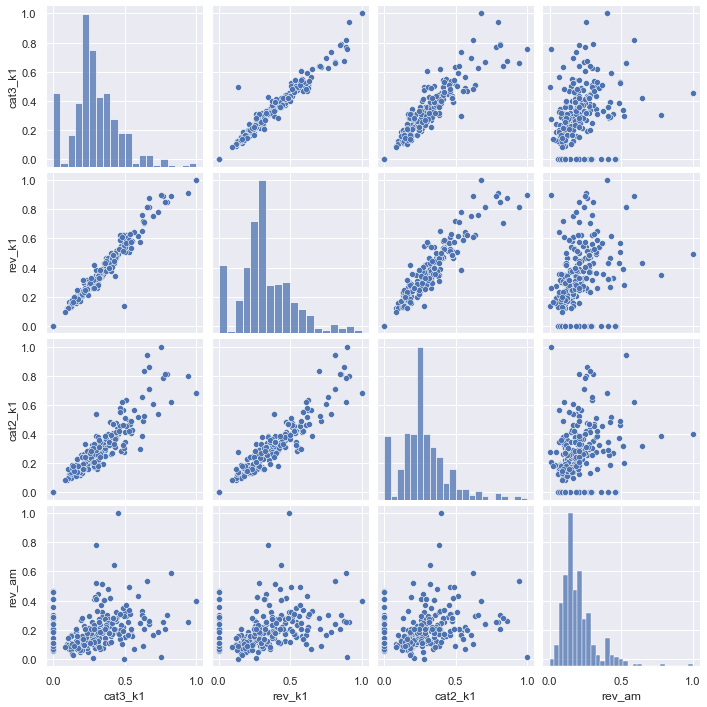

In [34]:
cols = ['cat3_k1','rev_k1','cat2_k1','rev_am']
Df = data[cols]
sns.pairplot(Df)

Как видно из графиков, задача регрессии на данном наборе данных не может быть решена достаточно точно.

<AxesSubplot:xlabel='rev_am', ylabel='Count'>

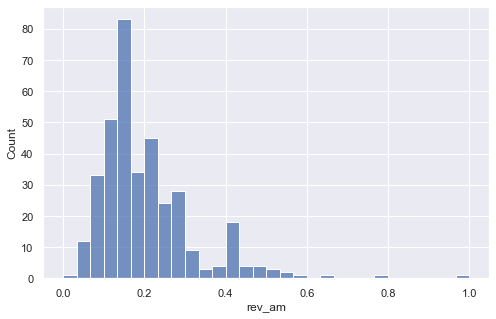

In [35]:
sns.histplot(target)

Исходя из полученной гистограммы, можно сделать вывод о том, что в данном случае распределение целевой переменной имеет "хвост", что может ухудшить результат работы модели.

Данные в наборе имеют различный масштаб, поэтому требуется провести нормализацию. Также проведем разбиение набора данных на тестовую и обучающую выборку с отношением 25% / 75%.

In [36]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size = 0.75, shuffle = True, random_state = 1)

В качестве первой модели была взята гребневая регрессия с поиском лучшего коэффициента alpha. 

In [37]:
RidgeEstim = Ridge()
alpha = np.linspace(1, 100, 1000)
grid = {'alpha' : alpha, 'random_state' : [1]}
RidgeOpt = GridSearchCV(RidgeEstim, scoring = 'neg_mean_absolute_error', param_grid = grid, cv = 5)
RidgeOpt.fit(X_train,y_train)
Ridge_mae = mean_absolute_error(y_test,RidgeOpt.predict(X_test))
'Средняя абсолютная ошибка при использовании гребневой регрессии с подбором параметра alpha составляет: {}'.format(round(Ridge_mae,6))

'Средняя абсолютная ошибка при использовании гребневой регрессии с подбором параметра alpha составляет: 0.070222'

В качестве второй модели был взят случайный лес с поиском оптимального количества деревьев в ансамбле. Такие модели как xgboost, SGD и KNn не представлены в данном ноутбуке так как они показывали большу по сравнению с случайным лесом ошибку, при этом количество времени, требуемое для поиска оптимальных параметров, было значительным.

In [38]:
ForestEstimator= RandomForestRegressor(criterion = 'mae')
ForestEstimator.get_params()
param_grid = {'n_estimators' : [50,100,200]}
ForestOpt = GridSearchCV(ForestEstimator, param_grid = param_grid, cv = 5)
ForestOpt.fit(X_train,y_train)
RandomForest_mae = mean_absolute_error(y_test,ForestOpt.predict(X_test))
'Средняя абсолютная ошибка при использовании случайного леса с подбором количества деревьев в ансамбле составляет: {} '.format(round(RandomForest_mae, 6))

'Средняя абсолютная ошибка при использовании случайного леса с подбором количества деревьев в ансамбле составляет: 0.059576 '

In [39]:
'Ошибка, полученная на основе случайного леса меньше чем ошибка при использовании гребневой регрессии на {}%'.format(round((100 * (Ridge_mae/RandomForest_mae)) - 100, 2))

'Ошибка, полученная на основе случайного леса меньше чем ошибка при использовании гребневой регрессии на 17.87%'

  Так как целевая переменная имеет значительный "хвост" в своем распределении и в самом наборе данных много признаков, имеющих между собой сильную корреляцию, более точное решение задачи регрессии представляется трудной задачей. Для решения данной задачи более точно, требуется больший объем данных, а также описание признаков.